# 1. Data cleaning

## 1.1. Overview data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
onl_ret = pd.read_csv(r'/Users/minhnguyetnguyen/Documents/Theforage/tata/OnlineRetail.csv')
#profile = ProfileReport(onl_ret, title="Profiling Report")
onl_ret.head()

/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/57/lkbzvbp92nv6k9m7r10l7d3w0000gn/T/ipykernel_95924/1481620700.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  onl_ret = pd.read_csv(r"/Users/minhnguyetnguyen/Documents/Theforage/tata/OnlineRetail.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
onl_ret.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
541909,NaN,NaN,NaN,"5,176,450",NaN,NaN,NaN,NaN


In [3]:
#remove the last row since its not relevant
onl_ret.drop(onl_ret.index[-1], inplace=True)

## 1.2. Missing values

In [4]:
#remove the last row
onl_ret.drop(onl_ret.index[-1], inplace = True)

In [5]:
#missing values
onl_ret.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#showing missing values
null_description = onl_ret.loc[onl_ret["Description"].isnull()]
null_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [7]:
#checking the values of unit price in null description
null_description["UnitPrice"].value_counts()

UnitPrice
0.0    1454
Name: count, dtype: int64

I see a lot of zero value in Unit price but I will keem them for further investigation.

Next, we will handle the missing values in "CustomerID"

In [8]:
onl_ret.loc[onl_ret["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [9]:
#checking whether any Invoice has more than 1 CustomerID
a = onl_ret.groupby("InvoiceNo")["CustomerID"].nunique()
b = a[a>1]
b

Series([], Name: CustomerID, dtype: int64)

The output shows each Invoice has only one CustomerID. 
Hence, I will impute the null values in CustomerID by labeling them sperately according to the InvoiceNo (CustomerId = InvoiceNo)

In [10]:
onl_ret["CustomerID"] = onl_ret["CustomerID"].fillna(onl_ret["InvoiceNo"])
onl_ret.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

## 1.3. Checking Out-of-range data

### Quantity column

In [11]:
#transform data type of Quantity from string to numeric
onl_ret['Quantity'] = pd.to_numeric(onl_ret['Quantity'])

In [12]:
#Check Quantity <0
onl_ret[onl_ret["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


10624 records have negative values in quantity. They might be returned items.

In [13]:
#Check Quantity = 0
onl_ret[onl_ret["Quantity"]==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


There is no record showing quantity equal to 0

### Unit price column

In [14]:
onl_ret.describe()

,Quantity,UnitPrice
count,541908.000000,541908.000000
mean,9.552262,4.611113
std,218.081359,96.759942
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [15]:
#checking unit price < 0
onl_ret[onl_ret["UnitPrice"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,A563186,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,A563187,United Kingdom


Two records show the bad debt - the sales amount which were unlikely to be collected. It reduced the original sales.

In [16]:
onl_ret[(onl_ret["UnitPrice"]==0) & (onl_ret["Quantity"]>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,536414,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,536545,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,536546,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,536547,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,536549,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,12/7/2011 18:36,0.0,581211,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,581234,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,581406,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,581406,United Kingdom


1179 records have zero value in unit price. From my understanding, they might be free samples/gifts/ promotion giveaway or equal value exchange items.

In [17]:
onl_ret[(onl_ret["UnitPrice"]==0) & (onl_ret["Quantity"]<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,536589,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,536764,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,536996,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,536997,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,536998,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,581210,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,581212,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,581213,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,581226,United Kingdom


1336 records with negative values in quantity and 0 in unit price. They might be damaged, missing items or adjustment records.

In [18]:
#Check Country Column
onl_ret["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

There are some orders which do not specify the Country.

## 1.4. Add a new column: Sale amount

In [19]:
onl_ret['SaleAmount'] = onl_ret['Quantity'] * onl_ret['UnitPrice']
onl_ret.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


 After checking, now I will remove the records where quantity is <1 and  unit price is ≤ 0

## 1.5. Removing the bad data

In [20]:
onl_ret_clean = onl_ret[(onl_ret["Quantity"]>= 1) & (onl_ret["UnitPrice"]>0)].reset_index(drop=True)
onl_ret_clean.info()                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530103 entries, 0 to 530102
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530103 non-null  object 
 1   StockCode    530103 non-null  object 
 2   Description  530103 non-null  object 
 3   Quantity     530103 non-null  int64  
 4   InvoiceDate  530103 non-null  object 
 5   UnitPrice    530103 non-null  float64
 6   CustomerID   530103 non-null  object 
 7   Country      530103 non-null  object 
 8   SaleAmount   530103 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 36.4+ MB


Now we have a clean and good to use dataset 

# 2. EDA

## 2.1. Task 1 - Sales Trend by Years

The CEO of the retail store is interested to view the time series of the revenue data for the year 2011 only. He would like to view granular data by looking into revenue for each month. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year.

In [21]:
# Assuming 'onl_ret_clean' is your cleaned DataFrame
onl_ret_clean['InvoiceDate'] = pd.to_datetime(onl_ret_clean['InvoiceDate'])  # Convert 'InvoiceDate' to datetime
onl_ret_clean['Year'] = onl_ret_clean['InvoiceDate'].dt.year

# Filter data for the year 2011
onl_ret_clean_2011 = onl_ret_clean[onl_ret_clean['Year'] == 2011]

# Create a 'Month'
onl_ret_clean_2011['Month'] = onl_ret_clean_2011['InvoiceDate'].dt.month

# Group by month-year and sum the sale amounts
sales_by_year_2011 = onl_ret_clean_2011.groupby('Month')['SaleAmount'].sum().reset_index()
sales_by_year_2011.sort_values(by="SaleAmount", ascending=False)

/var/folders/57/lkbzvbp92nv6k9m7r10l7d3w0000gn/T/ipykernel_95924/1721420784.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onl_ret_clean_2011['Month'] = onl_ret_clean_2011['InvoiceDate'].dt.month


,Month,SaleAmount
10,11,1509496.330
9,10,1154979.300
8,9,1058590.172
4,5,770536.020
5,6,761739.900
7,8,759138.380
6,7,719221.191
2,3,717639.360
0,1,691364.560
11,12,638777.830


/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


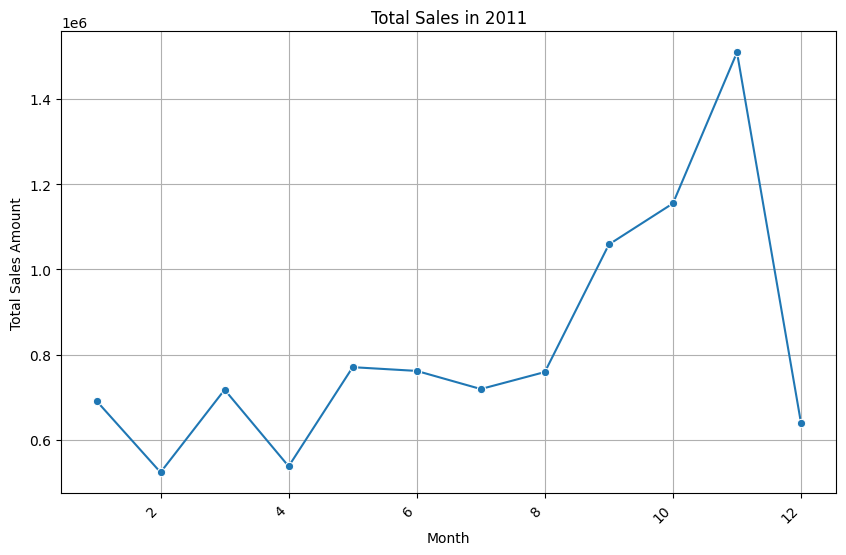

In [22]:
# Plotting a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='SaleAmount', data=sales_by_year_2011, marker='o')
plt.title('Total Sales in 2011')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

There was a significantly and continuously increase trend from August to November before going down to that level as the first months of the year.
The highest sale amount falls in November while the lowest figure was seen in February and April.

## 2.2 Task 2 - Top 10 countries

The CMO is interested in viewing the top 10 countries which are generating the highest revenue. Additionally, the CMO is also interested in viewing the quantity sold along with the revenue generated.



In [23]:
top_countries = onl_ret_clean.groupby("Country").agg({'SaleAmount':'sum', 'Quantity':'sum'}).reset_index()
top_countries = top_countries.sort_values(by='SaleAmount',ascending=False)
top10=top_countries.head(10)
top10

,Country,SaleAmount,Quantity
36,United Kingdom,9025222.084,4662390
24,Netherlands,285446.340,200361
10,EIRE,283453.960,147173
14,Germany,228867.140,119261
13,France,209700.260,112100
0,Australia,138521.310,83901
31,Spain,61577.110,27940
33,Switzerland,57089.900,30629
3,Belgium,41196.340,23237
32,Sweden,38378.330,36083


/var/folders/57/lkbzvbp92nv6k9m7r10l7d3w0000gn/T/ipykernel_95924/1873119204.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Country', y='Quantity',data=top10,palette='muted',label='Quantity Sold')
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


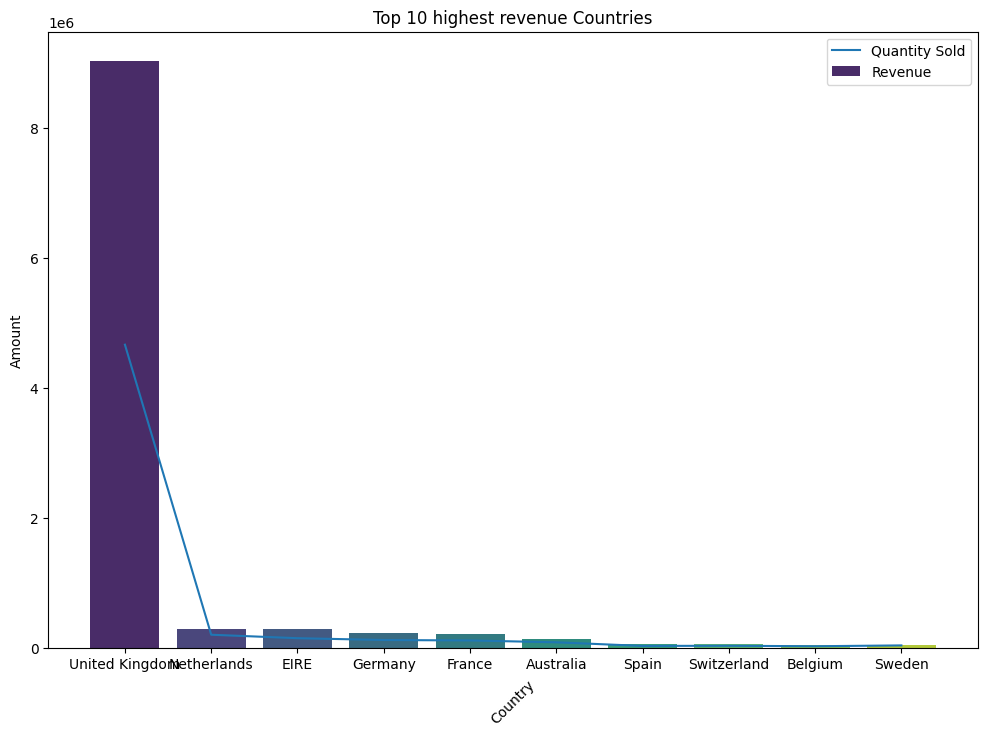

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x='Country',y='SaleAmount', data=top10, palette='viridis', label='Revenue')
sns.lineplot(x='Country', y='Quantity',data=top10,palette='muted',label='Quantity Sold')
plt.title('Top 10 highest revenue Countries')
plt.xlabel('Country',rotation=45)
plt.ylabel('Amount')
plt.legend()
plt.show()

/var/folders/57/lkbzvbp92nv6k9m7r10l7d3w0000gn/T/ipykernel_95924/3807354216.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Country', y='Quantity',data=top_no_UK,palette='muted',label='Quantity Sold')
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


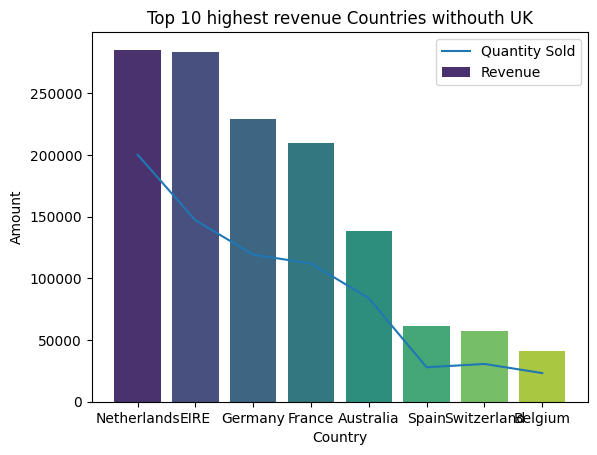

In [25]:
top_no_UK=top_countries.iloc[1:9]
sns.barplot(x='Country', y='SaleAmount',data=top_no_UK, palette='viridis', label='Revenue')
sns.lineplot(x='Country', y='Quantity',data=top_no_UK,palette='muted',label='Quantity Sold')
plt.title('Top 10 highest revenue Countries withouth UK')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.legend()
plt.show();

## 2.3 Task 3 - Top 10 customers

The CMO of the online retail store wants to view the information on the top 10 customers by revenue. He is interested in a visual that shows the greatest revenue generating customer at the start and gradually declines to the lower revenue generating customers. The CMO wants to target the higher revenue generating customers and ensure that they remain satisfied with their products.

In [26]:
top_customer = onl_ret_clean.groupby("CustomerID").agg({"SaleAmount":'sum'}).reset_index()
top_customer = top_customer.sort_values(by='SaleAmount', ascending=False)
top10_cus=top_customer.head(10)
top10_cus

,CustomerID,SaleAmount
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194550.79
3008,16446.0,168472.50
1879,14911.0,143825.06
55,12415.0,124914.53
1333,14156.0,117379.63
3771,17511.0,91062.38
2702,16029.0,81024.84
0,12346.0,77183.60


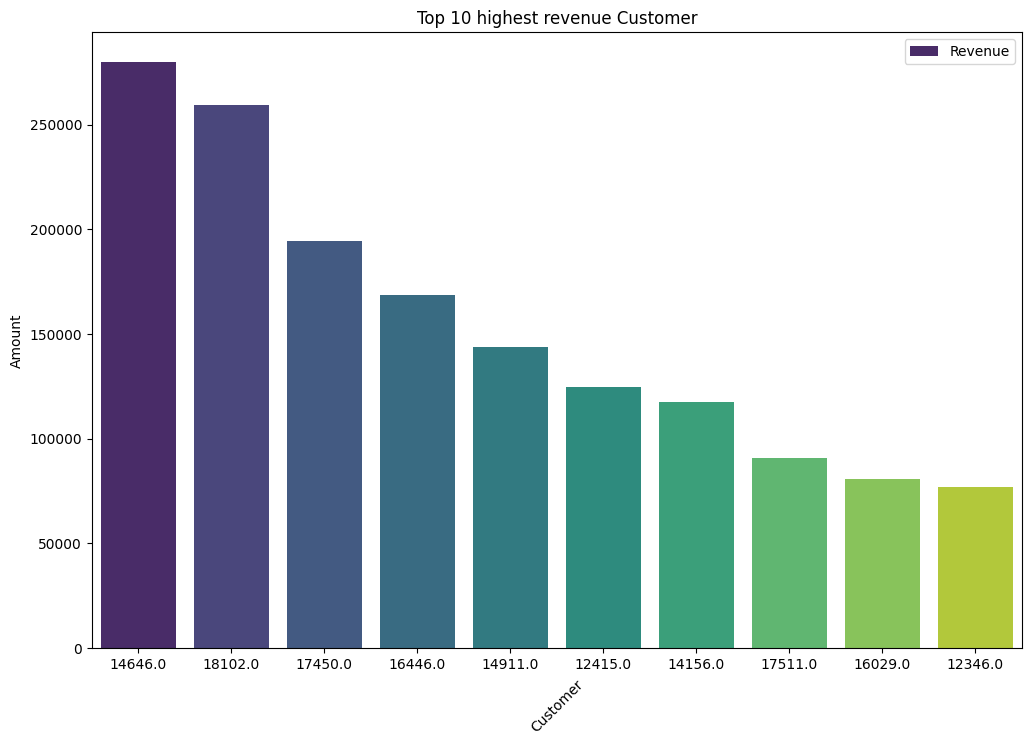

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='CustomerID',y='SaleAmount', data=top10_cus, palette='viridis', label='Revenue',order=top10_cus['CustomerID'])
plt.title('Top 10 highest revenue Customer')
plt.xlabel('Customer', rotation = 45)
plt.ylabel('Amount')
plt.legend()
plt.show()

In [28]:
import wordcloud
import PIL
print("wordcloud version:", wordcloud.__version__)
print("Pillow version:", PIL.__version__)

wordcloud version: 1.8.2.2
Pillow version: 8.3.2


In [29]:
from PIL import Image
from wordcloud import WordCloud
Image.MAX_IMAGE_PIXELS = None


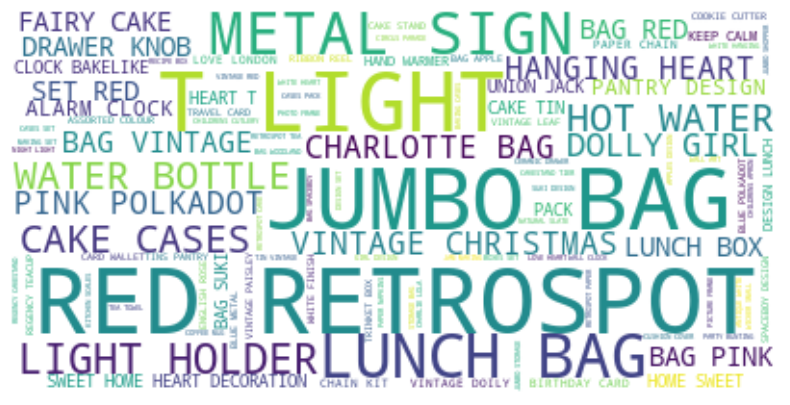

In [33]:
#from nltk.corpus import stopwords
top10_customers = top_customer['CustomerID'].head(10)
top10_transactions = onl_ret_clean[onl_ret_clean['CustomerID'].isin(top10_customers)]

all_descriptions =onl_ret_clean['Description'].str.cat(sep=' ')
# Generate WordCloud
wordcloud = WordCloud(background_color='white').generate(all_descriptions)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
#from PIL import __version__
#print(__version__)

8.3.2


## 2.4. Task 4 - Demand

The CEO is looking to gain insights on the demand for their products. He wants to look at all countries and see which regions have the greatest demand for their products. Once the CEO gets an idea of the regions that have high demand, he will initiate an expansion strategy which will allow the company to target these areas and generate more business from these regions. He wants to view the entire data on a single view without the need to scroll or hover over the data points to identify the demand. There is no need to show data for the United Kingdom as the CEO is more interested in viewing the countries that have expansion opportunities.

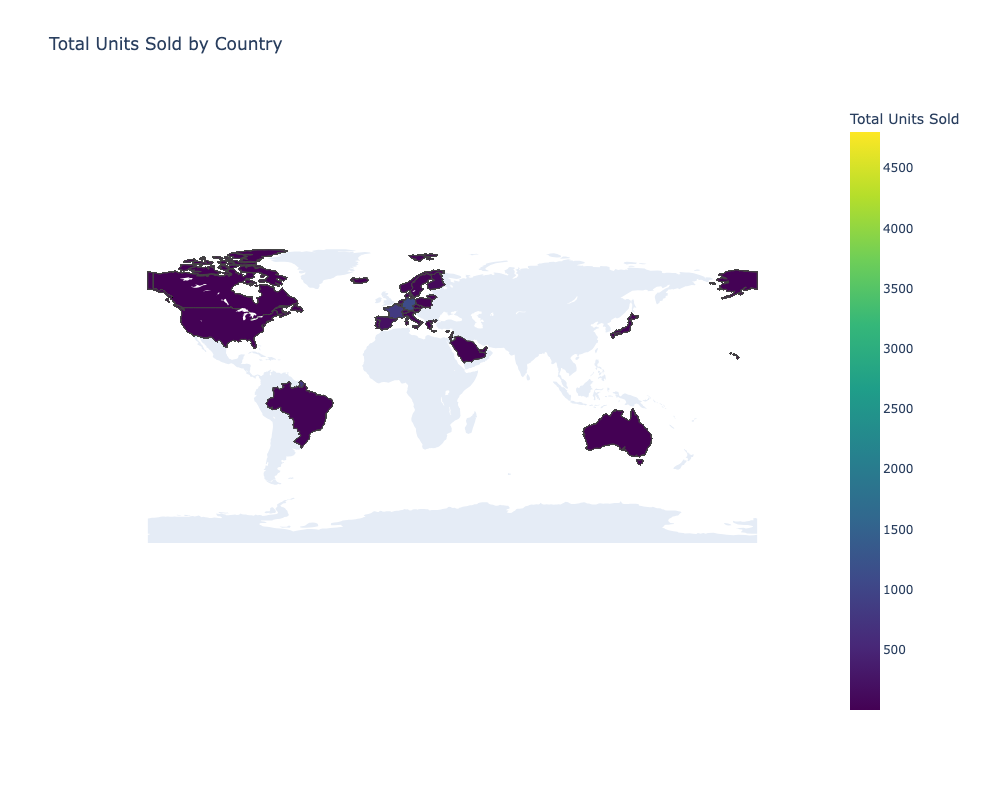

In [38]:
import plotly.express as px
sales_by_country=onl_ret_clean.groupby(["Country","StockCode"]).agg({"SaleAmount":'sum',"Quantity":'sum'}).reset_index()
# Filter out the United Kingdom
sales_by_country_filtered = sales_by_country[sales_by_country['Country'] != 'United Kingdom']

# Create a choropleth map using plotly
fig = px.choropleth(
    sales_by_country_filtered,
    locations='Country',
    locationmode='country names',
    color='Quantity',
    color_continuous_scale='Viridis',
    title='Total Units Sold by Country',
    labels={'Quantity': 'Total Units Sold'}
)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
    ),
    geo2=dict(
        showframe=False,
        showcoastlines=False,
    ),
    height=800,  # Set the height to expand the map
)
# Show the figure
fig.show()


In [43]:
onl_ret_filtered = onl_ret_clean[onl_ret_clean['Country'] != 'United Kingdom']

# Create a pivot table
pivot_table = pd.pivot_table(
    onl_ret_filtered,
    values='Quantity',
    index=['Country', 'StockCode','Description'],
    aggfunc='sum'
).reset_index()
# Find the index of the maximum quantity in each country
max_quantity_idx = pivot_table.groupby('Country')['Quantity'].idxmax()

# Filter the pivot table based on the max quantity indices
max_quantity_per_country = pivot_table.loc[max_quantity_idx]

# Show the resulting table
print(max_quantity_per_country)

                    Country StockCode                          Description  \
225               Australia     22492              MINI PAINT SET VINTAGE    
684                 Austria     21918     SET 12 KIDS COLOUR  CHALK STICKS   
922                 Bahrain     23076           ICE CREAM SUNDAE LIP GLOSS   
1019                Belgium     21212      PACK OF 72 RETROSPOT CAKE CASES   
1724                 Brazil     21430   SET/3 RED GINGHAM ROSE STORAGE BOX   
1867                 Canada     37370           RETRO COFFEE MUGS ASSORTED   
1973        Channel Islands     21785                         RAIN PONCHO    
2492                 Cyprus     22335       HEART DECORATION PAINTED ZINC    
2845         Czech Republic     22578   WOODEN STAR CHRISTMAS SCANDINAVIAN   
2901                Denmark     21915               RED  HARMONICA IN BOX    
3311                   EIRE     21212      PACK OF 72 RETROSPOT CAKE CASES   
5145     European Community     22571         ROCKING HORSE RED 

In [46]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 6.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 7.4 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
   ━

In [45]:
from fbprophet import Prophet

# Assuming 'onl_ret_clean' is your DataFrame with a datetime column 'InvoiceDate' and a numeric column 'SaleAmount'
sales_data = onl_ret_clean[['InvoiceDate', 'SaleAmount']].rename(columns={'InvoiceDate': 'ds', 'SaleAmount': 'y'})

# Create a Prophet model
model = Prophet()

# Fit the model with historical sales data
model.fit(sales_data)

# Create a dataframe with future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

# Generate forecast
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


ModuleNotFoundError: No module named 'fbprophet'